In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set(rc={'figure.figsize': (12, 8)})

# 1. Getting the data

In [141]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
whole_data = pd.concat([train_data, test_data], ignore_index=True)

In [142]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [143]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [144]:
train_data.shape

(891, 12)

In [145]:
test_data.shape

(418, 11)

In [146]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# 2. Missing values

In [147]:
whole_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Columns that have missing data: __Age, Cabin, Fare, Embarked__

__First we fill the missing value in 'Fare'__

In [148]:
whole_data[whole_data.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [149]:
whole_data.Fare.fillna(whole_data[whole_data.Pclass == 3]['Fare'].median(), inplace=True)

In [150]:
whole_data[whole_data.PassengerId == 1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S


__We will fill the missing value in 'Embarked' with the mode of column__

In [151]:
whole_data.Embarked.mode()

0    S
dtype: object

In [152]:
whole_data['Embarked'].fillna('S', inplace=True)

In [153]:
whole_data.Age.fillna(whole_data['Age'].mean(), inplace=True)

In [154]:
whole_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [155]:
whole_data.loc[whole_data.Cabin.notnull(), 'Cabin'] = 1
whole_data.loc[whole_data.Cabin.isnull(), 'Cabin'] = 0

In [156]:
whole_data.Cabin.isnull().sum()

0

In [157]:
whole_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

# 3. Features

In [184]:
whole_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [185]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [186]:
prepared_whole_data = whole_data.drop(labels = ['Ticket', 'Name'], axis=1)

In [187]:
prepared_whole_data["Sex"] = np.where(prepared_whole_data["Sex"] == "female", 0, 1)

In [188]:
prepared_whole_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,0,S
1,2,1.0,1,0,38.0,1,0,71.2833,1,C
2,3,1.0,3,0,26.0,0,0,7.9250,0,S
3,4,1.0,1,0,35.0,1,0,53.1000,1,S
4,5,0.0,3,1,35.0,0,0,8.0500,0,S


In [189]:
prepared_whole_data['Family'] = prepared_whole_data.Parch + prepared_whole_data.SibSp

In [190]:
prepared_whole_data['Is_Alone'] = prepared_whole_data.Family == 0

In [191]:
prepared_whole_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family,Is_Alone
0,1,0.0,3,1,22.0,1,0,7.2500,0,S,1,False
1,2,1.0,1,0,38.0,1,0,71.2833,1,C,1,False
2,3,1.0,3,0,26.0,0,0,7.9250,0,S,0,True
3,4,1.0,1,0,35.0,1,0,53.1000,1,S,1,False
4,5,0.0,3,1,35.0,0,0,8.0500,0,S,0,True


In [193]:
prepared_whole_data = pd.concat([prepared_whole_data,
                                pd.get_dummies(prepared_whole_data.Embarked, prefix="Emb", drop_first = True)], axis=1)

In [194]:
prepared_whole_data = prepared_whole_data.drop(['Embarked', 'SibSp', 'Parch'], axis=1)

In [195]:
prepared_whole_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Family,Is_Alone,Emb_Q,Emb_S
0,1,0.0,3,1,22.0,7.2500,0,1,False,0,1
1,2,1.0,1,0,38.0,71.2833,1,1,False,0,0
2,3,1.0,3,0,26.0,7.9250,0,0,True,0,1
3,4,1.0,1,0,35.0,53.1000,1,1,False,0,1
4,5,0.0,3,1,35.0,8.0500,0,0,True,0,1


# 4. Prediction

RF Accuracy: 83.24%
The cross validated score for Random forest is: 83.42


Text(0.5, 1.05, 'Confusion_matrix for RF')

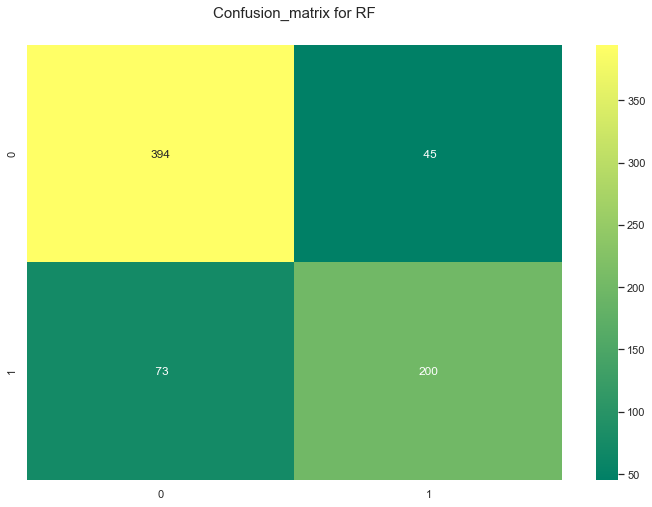

In [208]:
# Data to be predicted
X_to_be_predicted = prepared_whole_data[prepared_whole_data.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

#Training data
train_data = prepared_whole_data
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train  = train_data.drop(['Survived'], axis = 1)

##Random forest
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [209]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv


In [211]:
submission.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
